<a href="https://colab.research.google.com/github/NSR9/PythonForML-AI-Notes/blob/master/S7/S7_mainFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision

In [20]:
# mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/S7_final')

In [0]:
# Apply Image Transforms

import image_transformations #drive
import numpy as np
from torchvision import transforms

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)

train_transform = trans.train_transforms()
test_transform = trans.test_transforms()
                                       

In [23]:
# Load Train & Test Dataset

train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = train_transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True, num_workers=4)

test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = test_transform)
testloader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=False, num_workers=4)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


**Show some Images**

horse  frog  frog  deer


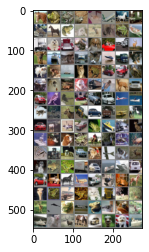

In [24]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize this is make sure the image is visible, if this step is skipped then the resulting images have a dark portion
    npimg = img.numpy()   # converting image to numpy array format
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    # transposing npimg array


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
# Model Summary

import cifar10_models as models # drive
!pip install torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = models.cfarResNet(False).to(device)
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 34, 34]             432
              ReLU-2           [-1, 16, 34, 34]               0
       BatchNorm2d-3           [-1, 16, 34, 34]              32
           Dropout-4           [-1, 16, 34, 34]               0
            Conv2d-5           [-1, 32, 34, 34]           4,608
              ReLU-6           [-1, 32, 34, 34]               0
       BatchNorm2d-7           [-1, 32, 34, 34]              64
           Dropout-8           [-1, 32, 34, 34]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           9,216
             ReLU-14           [-1

In [26]:
import execute # this is to train & test the model

model = models.cfarResNet().to(device)


 # this object, model of Net() class is passed onto Test_Train() object model's method train & test
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

model1 = execute.Test_Train()
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler, L1lambda=1e-5)
  model1.test(model, device, testloader,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3579676151275635 Batch_id=390 Accuracy=42.09: 100%|██████████| 391/391 [00:31<00:00, 12.32it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.3107).  Saving model ...

Test set: Average loss: 1.3107, Accuracy: 5204/10000 (52.04%)

EPOCH: 2


Loss=1.0875461101531982 Batch_id=390 Accuracy=61.78: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.3107 --> 1.0077).  Saving model ...

Test set: Average loss: 1.0077, Accuracy: 6471/10000 (64.71%)

EPOCH: 3


Loss=0.9333905577659607 Batch_id=390 Accuracy=69.85: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0077 --> 0.8215).  Saving model ...

Test set: Average loss: 0.8215, Accuracy: 7202/10000 (72.02%)

EPOCH: 4


Loss=0.8639445304870605 Batch_id=390 Accuracy=73.61: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.8215 --> 0.7154).  Saving model ...

Test set: Average loss: 0.7154, Accuracy: 7552/10000 (75.52%)

EPOCH: 5


Loss=0.7170323133468628 Batch_id=390 Accuracy=76.50: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7154 --> 0.6605).  Saving model ...

Test set: Average loss: 0.6605, Accuracy: 7706/10000 (77.06%)

EPOCH: 6


Loss=0.5659637451171875 Batch_id=390 Accuracy=78.27: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6605 --> 0.6164).  Saving model ...

Test set: Average loss: 0.6164, Accuracy: 7908/10000 (79.08%)

EPOCH: 7


Loss=0.6535601615905762 Batch_id=390 Accuracy=80.05: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6631, Accuracy: 7678/10000 (76.78%)

EPOCH: 8


Loss=0.6609957814216614 Batch_id=390 Accuracy=81.43: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6168, Accuracy: 7867/10000 (78.67%)

EPOCH: 9


Loss=0.6725243330001831 Batch_id=390 Accuracy=82.50: 100%|██████████| 391/391 [00:31<00:00, 12.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6164 --> 0.5609).  Saving model ...

Test set: Average loss: 0.5609, Accuracy: 8064/10000 (80.64%)

EPOCH: 10


Loss=0.6704304814338684 Batch_id=390 Accuracy=83.63: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5609 --> 0.5402).  Saving model ...

Test set: Average loss: 0.5402, Accuracy: 8155/10000 (81.55%)

EPOCH: 11


Loss=0.4309201240539551 Batch_id=390 Accuracy=85.02: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5402 --> 0.4949).  Saving model ...

Test set: Average loss: 0.4949, Accuracy: 8337/10000 (83.37%)

EPOCH: 12


Loss=0.5495637655258179 Batch_id=390 Accuracy=86.52: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4949 --> 0.4948).  Saving model ...

Test set: Average loss: 0.4948, Accuracy: 8354/10000 (83.54%)

EPOCH: 13


Loss=0.43635642528533936 Batch_id=390 Accuracy=88.37: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4948 --> 0.4714).  Saving model ...

Test set: Average loss: 0.4714, Accuracy: 8410/10000 (84.10%)

EPOCH: 14


Loss=0.5033159852027893 Batch_id=390 Accuracy=90.28: 100%|██████████| 391/391 [00:31<00:00, 12.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4714 --> 0.4591).  Saving model ...

Test set: Average loss: 0.4591, Accuracy: 8482/10000 (84.82%)

EPOCH: 15


Loss=0.44647789001464844 Batch_id=390 Accuracy=91.40: 100%|██████████| 391/391 [00:31<00:00, 12.42it/s]


Validation loss has  decreased (0.4591 --> 0.4534).  Saving model ...

Test set: Average loss: 0.4534, Accuracy: 8515/10000 (85.15%)



Text(0.5, 1.0, 'Test Accuracy')

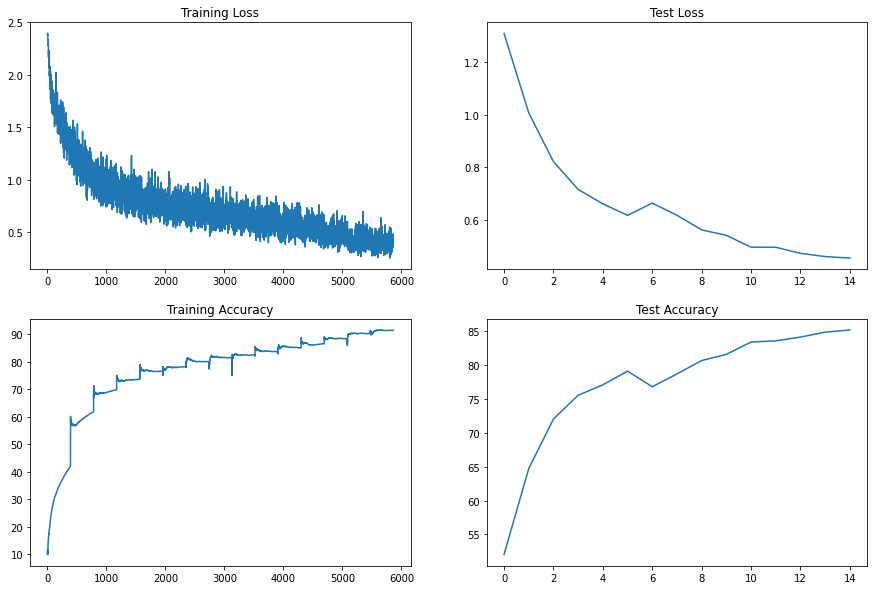

In [28]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")